<a href="https://colab.research.google.com/github/niladri-rkmvu/dsa-2025/blob/12.graphs/graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph ADT

In [ ]:
class Graph:
    def __init__(self):
        self.adj_list = {}

    def print_graph(self):
        print("-----------")
        print(f"printing graph")
        print("----------- ")
        for vertex in self.adj_list:
            print(vertex, ":", self.adj_list[vertex])

    def add_vertex(self, vertex):
        if vertex not in self.adj_list:
            self.adj_list[vertex] = []
            return True
        else:
            print(f"Vertex {vertex} already exists")
            return False

    def add_vertices(self, vertices):
        for vertex in vertices:
            if vertex not in self.adj_list:
                self.adj_list[vertex] = []
            else:
                print(f"Vertex {vertex} already exists")
        return True

    def add_edge(self, v1, v2):
        if v1 in self.adj_list and v2 in self.adj_list:
            if v2 not in self.adj_list[v1]:
                self.adj_list[v1].append(v2)
            if v1 not in self.adj_list[v2]:
                self.adj_list[v2].append(v1)
            return True
        else:
            print(f"Cannot add edge, one or both vertices {v1}, {v2} do not exist")
            return False

    def remove_edge(self, v1, v2):
        if v1 not in self.adj_list or v2 not in self.adj_list:
            print(f"Cannot remove edge, one or both vertices {v1}, {v2} do not exist")
            return False

        if v2 in self.adj_list[v1]:
            self.adj_list[v1].remove(v2)
        if v1 in self.adj_list[v2]:
            self.adj_list[v2].remove(v1)
        return True

    def remove_vertex(self, vertex):
        if vertex not in self.adj_list:
            print(f"Vertex {vertex} does not exist")
            return False

        # iterate over a copy to avoid modification issues
        for other_vertex in list(self.adj_list[vertex]):
            self.adj_list[other_vertex].remove(vertex)

        del self.adj_list[vertex]
        return True


# Driver code
if __name__ == "__main__":
    g = Graph()

    print("=== Adding vertices ===")
    g.add_vertex(1)
    g.add_vertex(2)
    g.add_vertex(3)
    g.add_vertex(1)   # duplicate test
    g.add_vertices([3,4,5])  # mixed: 3 exists, 4 & 5 new
    g.print_graph()

    print("\n=== Adding edges ===")
    g.add_edge(1,2)
    g.add_edge(2,3)
    g.add_edge(4,5)
    g.add_edge(1,5)
    g.add_edge(1,6)   # invalid: vertex 6 not present
    g.print_graph()

    print("\n=== Removing edges ===")
    g.remove_edge(1,2)   # valid removal
    g.remove_edge(2,5)   # invalid: no such edge
    g.remove_edge(6,1)   # invalid: vertex 6 not present
    g.print_graph()

    print("\n=== Removing vertices ===")
    g.remove_vertex(3)   # valid removal
    g.remove_vertex(6)   # invalid: vertex not present
    g.print_graph()

    print("\n=== Final Graph ===")
    g.print_graph()

=== Adding vertices ===
Vertex 1 already exists
Vertex 3 already exists
-----------
printing graph
----------- 
1 : []
2 : []
3 : []
4 : []
5 : []

=== Adding edges ===
Cannot add edge, one or both vertices 1, 6 do not exist
-----------
printing graph
----------- 
1 : [2, 5]
2 : [1, 3]
3 : [2]
4 : [5]
5 : [4, 1]

=== Removing edges ===
Cannot remove edge, one or both vertices 6, 1 do not exist
-----------
printing graph
----------- 
1 : [5]
2 : [3]
3 : [2]
4 : [5]
5 : [4, 1]

=== Removing vertices ===
Vertex 6 does not exist
-----------
printing graph
----------- 
1 : [5]
2 : []
4 : [5]
5 : [4, 1]

=== Final Graph ===
-----------
printing graph
----------- 
1 : [5]
2 : []
4 : [5]
5 : [4, 1]


# Graph Traversals = BFS, DFS

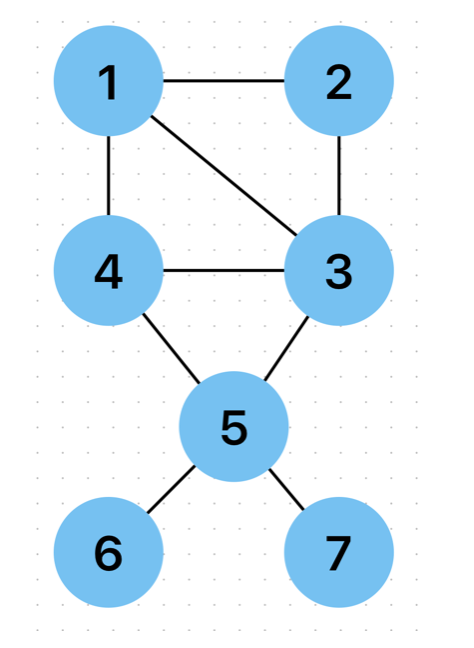

In [6]:
from collections import deque

class Graph:
    def __init__(self):
        self.adj_list = {}

    def print_graph(self):
        print("-----------")
        print("printing graph")
        print("----------- ")
        for vertex in self.adj_list:
            print(vertex, ":", self.adj_list[vertex])

    def add_vertex(self, vertex):
        if vertex not in self.adj_list:
            self.adj_list[vertex] = []
            return True
        else:
            # print(f"Vertex {vertex} already exists")
            return False

    def add_vertices(self, vertices):
        for vertex in vertices:
            if vertex not in self.adj_list:
                self.adj_list[vertex] = []
        return True

    def add_edge(self, v1, v2):
        if v1 in self.adj_list and v2 in self.adj_list:
            if v2 not in self.adj_list[v1]:
                self.adj_list[v1].append(v2)
            if v1 not in self.adj_list[v2]:
                self.adj_list[v2].append(v1)
            return True
        else:
            # print(f"Cannot add edge, one or both vertices {v1}, {v2} do not exist")
            return False

    def remove_edge(self, v1, v2):
        if v1 not in self.adj_list or v2 not in self.adj_list:
            # print(f"Cannot remove edge, one or both vertices {v1}, {v2} do not exist")
            return False

        if v2 in self.adj_list[v1]:
            self.adj_list[v1].remove(v2)
        if v1 in self.adj_list[v2]:
            self.adj_list[v2].remove(v1)
        return True

    def remove_vertex(self, vertex):
        if vertex not in self.adj_list:
            # print(f"Vertex {vertex} does not exist")
            return False

        for other_vertex in list(self.adj_list[vertex]):
            self.adj_list[other_vertex].remove(vertex)

        del self.adj_list[vertex]
        return True

    # BFS logic using queue
    def bfs(self, start_vertex):
        if start_vertex not in self.adj_list:
            print(f"Start vertex {start_vertex} does not exist")
            return []

        explored = set([start_vertex])
        queue = deque([start_vertex])
        traversal_order = []

        while queue:
            current = queue.popleft()
            traversal_order.append(current)   # add when dequeued
            for neighbor in self.adj_list[current]:
                if neighbor not in explored:
                    explored.add(neighbor)
                    queue.append(neighbor)
        return traversal_order

if __name__ == "__main__":
    g = Graph()
    vertex_edge_dict = {
                1 : [2, 3, 4],
                2 : [1, 3],
                3 : [1, 2, 4, 5],
                4 : [1, 3, 5],
                5 : [3, 4, 6, 7],
                6 : [5],
                7 : [5]
    }
    for vertex, edges in vertex_edge_dict.items():
        g.add_vertex(vertex)
        for edge in edges:
            g.add_edge(vertex, edge)
    g.add_vertices([1,2,3,4,5])
    g.print_graph()

    print("\n=== BFS Traversal from vertex 1 ===")
    print(g.bfs(1))   # Expected: [1, 2, 3, 4, 5, 6, 7] <-- 1 possibility

    print("\n=== BFS Traversal from vertex 7 ===")
    print(g.bfs(7))   # Expected: [7, 5, 3, 4, 6, 1, 2] <-- 1 possibility


-----------
printing graph
----------- 
1 : [2, 3, 4]
2 : [1, 3]
3 : [1, 2, 4, 5]
4 : [1, 3, 5]
5 : [3, 4, 6, 7]
6 : [5]
7 : [5]

=== BFS Traversal from vertex 1 ===
[1, 2, 3, 4, 5, 6, 7]

=== BFS Traversal from vertex 7 ===
[7, 5, 3, 4, 6, 1, 2]
